# How to remove K2 motion systematics with SFF?

You can use `lightkurve` to remove the motion from K2 data. Targets in K2 data move over multiple pixels during the exposure due to thruster firings. This can be corrected using the self flat fielding method (SFF), which you can read more about [here](LINK?). There is a full tutorial on how SFF works [here](http://lightkurve.keplerscience.org/tutorials/motion-correction/replicate-vanderburg-2014-k2sff.html). Here we will show a quick tutorial on how to use the correct function for light curves.

Let's download a K2 light curve of an exoplanet host star. Remember that for K2 data, we can use the same Kepler functions `KeplerTargetPixelFile` and `KeplerLightCurveFile` as they are the same instrument.

In [1]:
from lightkurve import search_lightcurvefile
lcf = search_lightcurvefile(247887989).download()  # returns a KeplerLightCurveFile
lc = lcf.PDCSAP_FLUX                               # returns a KeplerLightCurve

#Remove nans and outliers
lc = lc.remove_nans().remove_outliers()              

#Remove long term trends
lc = lc.flatten(window_length=401)

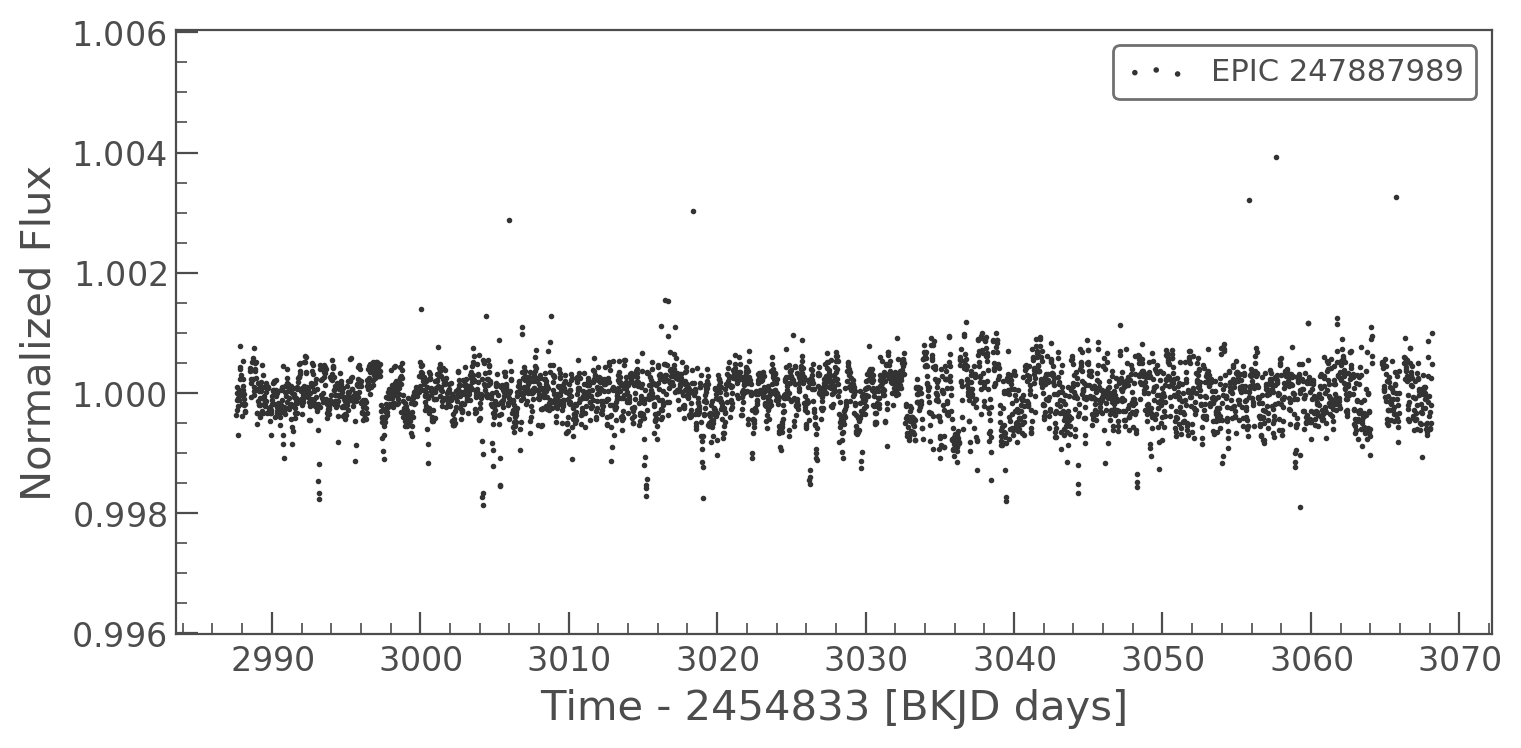

In [2]:
lc.scatter();

This light curve is of the object [K2-133b](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/DisplayOverview/nph-DisplayOverview?objname=K2-133+b&type=CONFIRMED_PLANET), which has a period of 3.0712 days. Let's plot the folded version of it to see what it looks like.

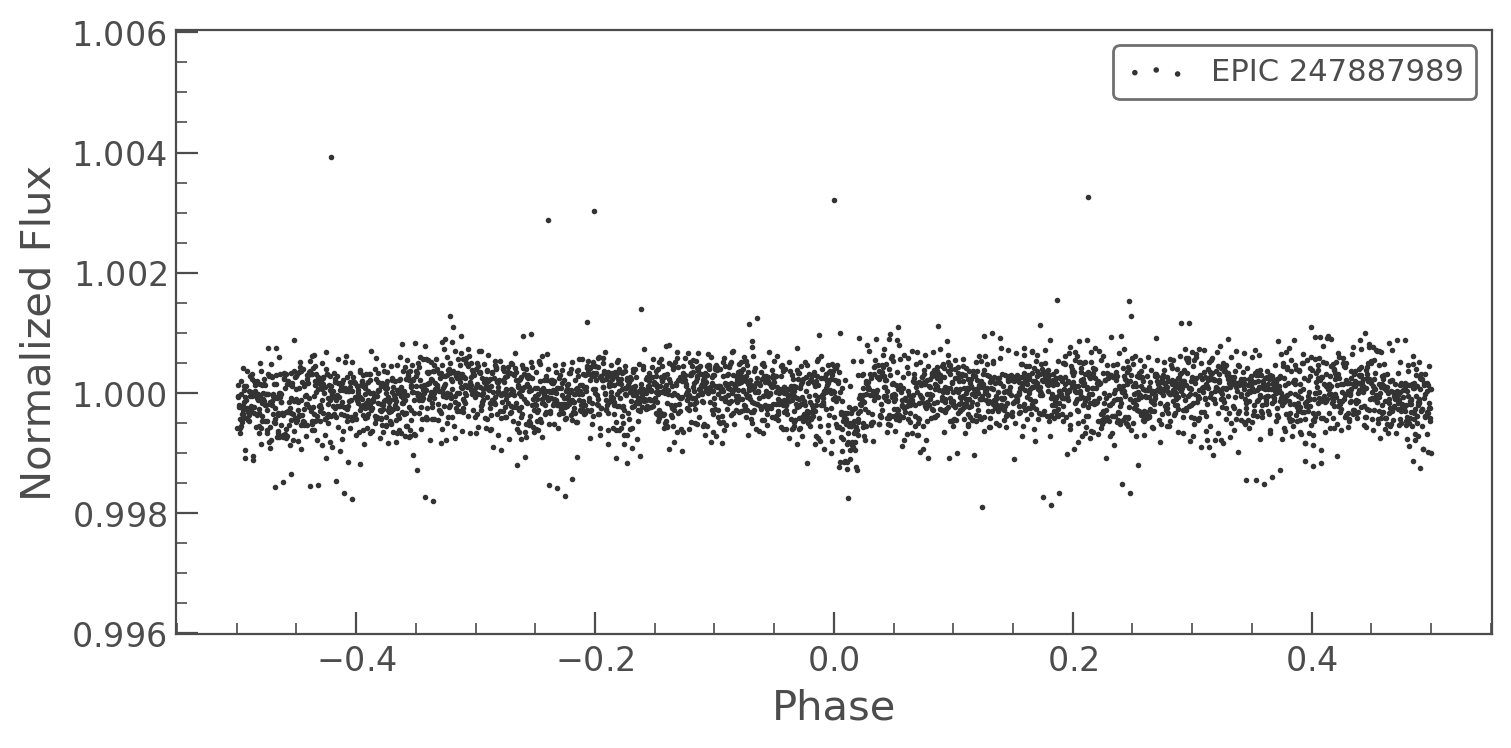

In [3]:
lc.fold(period=3.0712).scatter();

We can see the hint of an exoplanet transit close to the center, but the motion of the spacecraft has made it difficult to make out above the noise. We can use the `correct` function on the lightcurve to remove this motion. An in-depth look into how the algorithm works can be found [here](http://lightkurve.keplerscience.org/tutorials/motion-correction/replicate-vanderburg-2014-k2sff.html). You can pass the following keywords to the `correct` function:

* `polyorder` : *int*
            Degree of the polynomial which will be used to fit one centroid as a function of the other.
* `niters` : *int*
            Number of iterations
* `bins` : *int*
            Number of bins to be used to create the piece-wise interpolation of arclength vs flux correction.
* `windows` : *int*
            Number of windows to subdivide the data.  The SFF algorithm is run independently in each window.

This [tutorial](gully-tutorial) will teach you more about how to tune these parameters. For this problem, we will use the defaults, but increase the number of windows to 20.

In [ ]:
corr_lc = lc.correct(windows=20)

Now when we compare the two light curves we can see the clear signal from the exoplanet.

In [ ]:
ax = lc.fold(period=3.0712).scatter(color='red', alpha=0.5, label='With Motion')
ax = corr_lc.fold(period=3.0712).scatter(ax=ax, color='blue', alpha=0.5, label='Motion Corrected');